In [2]:
import pandas as pd

In [3]:
!ls ../data

AssayDataSetForDeeplearning.csv
Chembl23DataSetForFiltering_5andMore.csv
CompoundFingerPrints_LatentFectors_MultiBinary.csv
TargetFingerPrints_LatentFectors_MultiBinary.csv
smilesCode.csv


In [4]:
molFP = pd.read_csv("../data/CompoundFingerPrints_LatentFectors_MultiBinary.csv")

In [5]:
print molFP.head(2)
print molFP.shape

   Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.034022 -0.041817 -0.094760 -0.071590 -0.112854  0.042675   
1           1 -0.083000 -0.020922 -0.074884  0.052991 -0.251028  0.004487   

          6         7         8    ...           41        42        43  \
0  0.168476 -0.042804  0.062346    ...     0.195607 -0.418137  0.315373   
1  0.072715 -0.075709  0.140677    ...     0.281083 -0.479894  0.291036   

         44        45        46        47        48        49  molregno  
0  0.196828  0.103798 -0.224600  0.163702 -0.114103 -0.220554    482662  
1  0.099538  0.074489 -0.170453 -0.030128  0.030838 -0.215500    198087  

[2 rows x 52 columns]
(251467, 52)


In [6]:
targetFP = pd.read_csv("../data/TargetFingerPrints_LatentFectors_MultiBinary.csv")

In [7]:
targetFP.head(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,tid
0,0,-0.313639,0.015488,-0.136706,0.108383,-0.701586,0.027022,0.295834,-0.258954,0.357824,...,0.837774,-1.398470,0.825110,0.366030,0.186334,-0.568682,-0.015314,0.013875,-0.640900,1
1,1,-2.210590,0.783154,1.212254,-0.758268,-0.313671,-1.931098,0.528394,0.370218,-1.894403,...,-1.889061,2.618059,-0.081696,-0.256262,-1.117379,0.568687,-0.878046,1.762185,0.395499,3


In [8]:
assays = pd.read_csv("../data/AssayDataSetForDeeplearning.csv")

In [9]:
assays.shape

(998691, 19)

In [10]:
assays.groupby(assays.molregno).count()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1,activity_id,assay_id,doc_id,molregno,standard_relation,published_value,published_units,standard_value,standard_units,standard_flag,standard_type,organism,tid,AFFINITY_FLAG,AFFINITY_CLASS
molregno,,,,,,,,,,,,,,,,,,,
23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
97,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
115,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
146,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
148,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
154,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
161,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
173,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
198,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [11]:
trainingSetMols = assays.molregno.sample(n=1000)

In [12]:
trainingSetAssays = assays[assays.molregno.isin(trainingSetMols)]

In [13]:
trainingSetAssays= trainingSetAssays[["molregno","tid"]]

In [14]:
## Now merge the assays table with the 
trainingSetAssays =trainingSetAssays.merge(targetFP,on="tid")

In [15]:
trainingSetAssays.columns

Index([u'molregno', u'tid', u'Unnamed: 0', u'0', u'1', u'2', u'3', u'4', u'5',
       u'6', u'7', u'8', u'9', u'10', u'11', u'12', u'13', u'14', u'15', u'16',
       u'17', u'18', u'19', u'20', u'21', u'22', u'23', u'24', u'25', u'26',
       u'27', u'28', u'29', u'30', u'31', u'32', u'33', u'34', u'35', u'36',
       u'37', u'38', u'39', u'40', u'41', u'42', u'43', u'44', u'45', u'46',
       u'47', u'48', u'49'],
      dtype='object')

In [16]:
trainingSetAssays= trainingSetAssays.merge(molFP,on="molregno",suffixes=('_target','_mols'))

In [20]:
### Load MVAE
import numpy as np
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from mVAE.model import MoleculeVAE
from mVAE.utils import encode_smiles, decode_latent_molecule, interpolate, get_unique_mols
#import mVAE.mVAE
# number of dimensions to represent the molecules
# as the model was trained with this number, any operation made with the model must share the dimensions.
latent_dim = 292

# trained_model 0.99 validation accuracy
# trained with 80% of ALL chembl molecules, validated on the other 20.
trained_model = 'mVAE/chembl_23_model.h5'
charset_file = 'charset.json'

aspirin_smiles = 'CC(=O)Oc1ccccc1C(=O)O'

Using TensorFlow backend.


In [21]:
!ls mVAE

README.md           autoencoder_ipython environment.yml     utils.py
__init__.py         charset.json        model.py            utils.pyc
__init__.pyc        chembl_23_model.h5  model.pyc


In [22]:
# load charset and model
with open('mVAE/charset.json', 'r') as outfile:
    charset = json.load(outfile)

model = MoleculeVAE()
model.load(charset, trained_model, latent_rep_size = latent_dim)

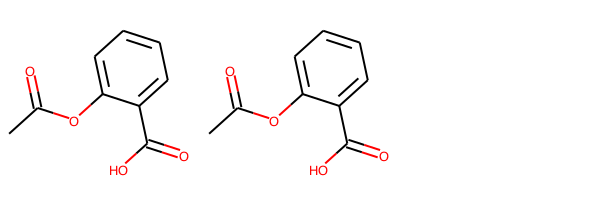

In [23]:
testSMILES = "CC(=O)Oc1ccccc1C(=O)O"
aspirin_latent = encode_smiles(testSMILES, model, charset)
#aspirin_latent

reconstructed_aspirin = decode_latent_molecule(aspirin_latent, model, charset, latent_dim)
original = Chem.MolFromSmiles(testSMILES)
reconstructued = Chem.MolFromSmiles(reconstructed_aspirin)

Draw.MolsToGridImage([original, reconstructued])

In [24]:
smilesFile = "/Users/raghuramsrinivas/miniconda2/Scripts/AVEBias/CalcBias/data/smilesCode.csv"

smilesDF = pd.read_csv(smilesFile,sep="\t",names=["molregno","smiles"])

In [25]:
trainSMILES = smilesDF[smilesDF.molregno.isin(trainingSetAssays.molregno)]

In [26]:
trainSMILES.reset_index(inplace=True)

if "index" in trainSMILES.columns:
    del trainSMILES["index"]

In [27]:
trainSMILES["encodedSMILES"] = None

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
listImages = []
listLatentFeatures = list()
for i in range(0,trainSMILES.shape[0]):
    
    try:
    ##Reconstruct to check if this a valid mol
        smilesCode= trainSMILES.iloc[i]["smiles"]
        molregno= trainSMILES.iloc[i]["molregno"]
        latentFeatures = encode_smiles(smilesCode, model, charset)
        reconsMol = Chem.MolFromSmiles(decode_latent_molecule(latentFeatures, model, 
                                               charset, latent_dim))
        if reconsMol!=None:
            listImages.append(reconsMol)
            #trainSMILES.set_value(148,"encodedSMILES",latentFeatures,inplace=True)
            #trainSMILES.loc[i,"encodedSMILES"]=latentFeatures.reshape(latent_dim,) #
            tempList =list(latentFeatures.reshape(latent_dim,))
            tempList.append(smilesCode)
            tempList.append(molregno)
            listLatentFeatures.append(tempList)
    except:
        continue


RDKit ERROR: [22:06:21] SMILES Parse Error: syntax error for input: 'Clc1ccc(OCCCCCCN\N=C(/NC#N)\)/c2ccncc2)cc1'
RDKit ERROR: [22:06:23] SMILES Parse Error: extra open parentheses for input: 'CC1CCc2ccc(cc12)N(C3CCN(Cc4ccccc4)CC3)C(=O)\C(=C\Cc5ccccc5'
RDKit ERROR: [22:06:35] SMILES Parse Error: syntax error for input: 'Cc1nc(NCC=C)c2ncn(\\C=C(3\)\NC@@H]3CO)c2n1'
RDKit ERROR: [22:06:38] SMILES Parse Error: unclosed ring for input: 'COc1cc(cc(OC)c1OC)[C@H]2N3[C@@H](Cc4c3[nH]c5ccccc45)C(=O)NCC3=O'
RDKit ERROR: [22:06:39] SMILES Parse Error: unclosed ring for input: 'NC(=N)Nc1ccc(CNC(=O)N2CCN(CC2)C(=O)O[C@@H]3CCC[C@@H](CCC3)OC(=O)N4CCN(CC4)C(=O)NCc5ccc(NC(=O)NC)c6)cc1'
RDKit ERROR: [22:06:44] SMILES Parse Error: syntax error for input: 'CC(C)(C)OC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C[C@@H](Cc2ccc(cc2)[(+](=O)[O-])C(=O)N[C@@H]3[C@H](O)Cc4ccccc4'
RDKit ERROR: [22:06:58] SMILES Parse Error: unclosed ring for input: 'COc1cccc2OC(c3ccccc3)c4cc(NS(=O)(=O)c5cccs5)ccc1c12'
RDKit ERROR: [22:07:10] Can't

RDKit ERROR: [22:08:54] SMILES Parse Error: unclosed ring for input: 'O=C1Nc2ccccc2N1C3CCN(Cc4ccc(cc4)c5nc6ccc(cc6nc5c7ccccc7)c8nn[nH]n7)CC3'
RDKit ERROR: [22:08:59] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [22:09:00] SMILES Parse Error: syntax error for input: '[Br-].COc1ccc(\C==N\Oc2c2[nH]c4ccccc4c3cc[n+]2Cc5ccccc5)cc1'
RDKit ERROR: [22:09:03] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 350 in file /Users/glandrum/anaconda/conda-bld/rdkit_1499409368875/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(bond_pin->getBeginAtomIdx(), bond_pin->getEndAtomIdx(), d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [22:09:06] SMILES Parse Error: extra close parentheses for input: 'CCn1c(nc2c(ncc(O)[C@H]3CCCNC3)c12)C#CC(C)(C)O)c4nonc4N'
RDKit ERROR: [22:09:08] SMILES Parse Error: extra close parentheses for input:

RDKit ERROR: [22:11:19] SMILES Parse Error: extra open parentheses for input: 'COc1ccc2nc3CCCCc3c(N4CCC(CN(CCCCC4)c5c6CCCCc6nc7ccc(OC)cc47)c2c1'
RDKit ERROR: [22:11:20] SMILES Parse Error: unclosed ring for input: 'CN(C)c1ccc(cc1)c2cc(cc3c4ccccc4[nH]c23)C(=O)NC5C(C)C'
RDKit ERROR: [22:11:20] SMILES Parse Error: syntax error for input: 'COc1cc2C(=O)N3CCC[C@H]3C=Nc2cc1OCCCC44C(=CCC#)CC#N)c5cccc6cccc6c56'
RDKit ERROR: [22:11:21] SMILES Parse Error: extra close parentheses for input: 'CCCn1c(nc2ccccc12)C3CCCCC3)Oc4ccccc4'
RDKit ERROR: [22:11:22] SMILES Parse Error: extra open parentheses for input: 'ON(=C\C=C\CCCOc2cccc(c2)c3ccnc(Nc4cc(N)cc(C1)c4)n3'
RDKit ERROR: [22:11:27] SMILES Parse Error: syntax error for input: 'CC12((C2CCCC2)c3nc(Nc4ccc(cc4OC)C(=O)NC5CCN(C)CC5)ncc3N(C)C1=O'
RDKit ERROR: [22:11:28] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [22:11:29] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 18 19 20 21 22 23 24 26 27
RDKit E

RDKit ERROR: [22:13:37] SMILES Parse Error: unclosed ring for input: 'COC1=CC=C2C(=CC1=O)[C@H](CCc3cc(OC)c(OC)c(OC)c3O)NC(=O)c4cccc(c4)C(=O)Nc5ccccc5N'
RDKit ERROR: [22:13:42] SMILES Parse Error: extra open parentheses for input: 'ONC(=O)COC(Sc1no[n+]([O-])c1S(=O)(=O)c2ccccc2'
RDKit ERROR: [22:13:43] SMILES Parse Error: unclosed ring for input: 'O=C(COc1ccccc1)N2CCNC[C@@H]2c3noc(n3)C4C[C@@H]5CC[C@H]4C4'
RDKit ERROR: [22:13:47] SMILES Parse Error: syntax error for input: 'OC(=O)CCCCCCC(=O)Nc1ccc(cc1)C2=C(C3CC(C(23)S(=O)(=O)Cc4ccc(Br)cc4)c5ccc(O)cc5'
RDKit ERROR: [22:13:48] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [22:13:56] SMILES Parse Error: extra open parentheses for input: 'CCCCCCCC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@H]2\\C=C/CCCNC(=O)\CC=C\C[C@@H](NC2=O)C(C\C'
RDKit ERROR: [22:13:59] SMILES Parse Error: extra open parentheses for input: 'C(CN(c2ccccc2C1)c3cccc4nc(nn34)N5CCCc6ccccc56'
RDKit ERROR: [22:14:03] SMILES Parse Error: extra c

Done.


In [56]:
colNames = ["%d_latfeatures"%i for i in range(0,latent_dim)]
colNames.append("smiles")
colNames.append("molregno")

dfLatentFeatures = pd.DataFrame(listLatentFeatures,columns=colNames)


In [58]:
dfLatentFeatures.shape

(736, 294)

In [61]:
trainingSetAssays= trainingSetAssays.merge(dfLatentFeatures,on="molregno",suffixes=('_target','_mols'))

In [63]:
trainingSetAssays.head()

,molregno,tid,Unnamed: 0_target,0_target,1_target,2_target,3_target,4_target,5_target,6_target,...,283_latfeatures,284_latfeatures,285_latfeatures,286_latfeatures,287_latfeatures,288_latfeatures,289_latfeatures,290_latfeatures,291_latfeatures,smiles
0,373381,8,4,-0.394897,-2.011116,-2.996444,-0.420671,-2.162800,-1.462696,-1.024078,...,0.261769,-0.030223,0.340163,0.032947,0.060127,-0.057701,-0.223097,0.067217,0.069613,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n3c4ccccc4...
1,373381,9,5,-2.201835,-0.853779,-0.086691,-3.492468,1.001788,-0.058123,0.022947,...,0.261769,-0.030223,0.340163,0.032947,0.060127,-0.057701,-0.223097,0.067217,0.069613,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n3c4ccccc4...
2,373381,9,5,-2.201835,-0.853779,-0.086691,-3.492468,1.001788,-0.058123,0.022947,...,0.261769,-0.030223,0.340163,0.032947,0.060127,-0.057701,-0.223097,0.067217,0.069613,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n3c4ccccc4...
3,373381,9,5,-2.201835,-0.853779,-0.086691,-3.492468,1.001788,-0.058123,0.022947,...,0.261769,-0.030223,0.340163,0.032947,0.060127,-0.057701,-0.223097,0.067217,0.069613,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n3c4ccccc4...
4,373381,9,5,-2.201835,-0.853779,-0.086691,-3.492468,1.001788,-0.058123,0.022947,...,0.261769,-0.030223,0.340163,0.032947,0.060127,-0.057701,-0.223097,0.067217,0.069613,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n3c4ccccc4...


In [64]:
targetCols = ["%d_target"%i for i in range(0,50)]
molregNoCols = ["%d_mols"%i for i in range(0,50)]
latfeatCols = ["%d_latfeatures"%i for i in range(0,latent_dim)]

In [67]:
arrayData = trainingSetAssays.as_matrix(columns=[targetCols+molregNoCols+latfeatCols])

In [72]:
trainingSetAssays.to_csv("../data/FeaturesAsMatrixv1.csv")

In [73]:
arrayData[:,0:50]

array([[-0.39489722, -2.01111555, -2.99644423, ..., -2.22576857,
        -0.62403411, -0.4175351 ],
       [-2.20183539, -0.85377884, -0.08669137, ...,  0.40441087,
         0.90877122, -1.84696865],
       [-2.20183539, -0.85377884, -0.08669137, ...,  0.40441087,
         0.90877122, -1.84696865],
       ..., 
       [-0.41953519, -0.19103697, -0.56395715, ...,  0.30842164,
        -0.22181775,  0.29430115],
       [-0.41953519, -0.19103697, -0.56395715, ...,  0.30842164,
        -0.22181775,  0.29430115],
       [-0.41953519, -0.19103697, -0.56395715, ...,  0.30842164,
        -0.22181775,  0.29430115]])